
Cipher is : MOBUEWO LI QOUOYNYVA PZYF BOPPOQ IEC GQO EVO ES PZO SOM UZEFOV PE NYFYP CF GP PZO SYSPZ VOJP WEVPZ GVK PGDO TGQP ES PZO OBOUPYEV TQEUOFF MO ZETO PZGP IEC ZGNO PZO TEFFYLYBYPI PE AYNO CF PZO TBOGFCQO ES IECQ UEWTGVI GVK PZGP IEC GUUOTP PZ  ZEVECQ GF MOBB GF PZO QOFTEVFYLYBYPI ES PZYF GFFYAVWOVP PZYF IOGQ PZO WOOPYVA MYBB PGDO TBGUO GP DOVFYVAPEV VYVO PGDO PZO LCF PZQOO ZCVKQOK PMOBNO FONOV FPGPYEVF SQEW PZO UOVPQGB DOOT PZO GKKQOFF GF MOBB GF PZO KGI G FOUQOP LOFP QOAGQKF

{'M': 0.018134715025906734, 'O': 0.15544041450777202, 'B': 0.038860103626943004, 'U': 0.02849740932642487, 'E': 0.06476683937823834, 'W': 0.015544041450777202, 'L': 0.012953367875647668, 'I': 0.025906735751295335, 'Q': 0.046632124352331605, 'Y': 0.05699481865284974, 'N': 0.015544041450777202, 'V': 0.05958549222797927, 'A': 0.015544041450777202, 'P': 0.12176165803108809, 'Z': 0.06476683937823834, 'F': 0.07772020725388601, 'C': 0.025906735751295335, 'G': 0.07253886010362694, 'S': 0.02072538860103627, 'J': 0

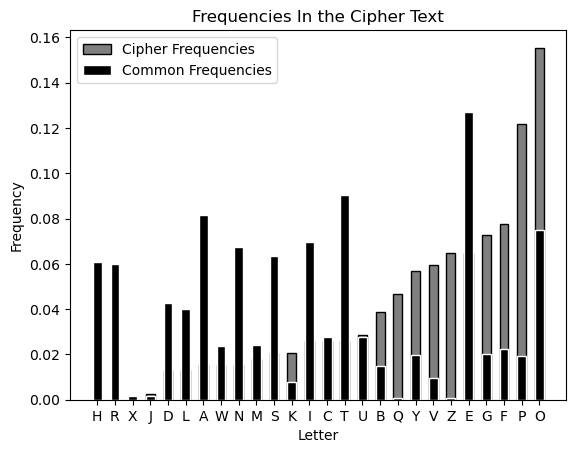

{'H': 'Z', 'R': 'Q', 'X': 'X', 'J': 'J', 'D': 'K', 'L': 'V', 'A': 'B', 'W': 'P', 'N': 'Y', 'M': 'G', 'S': 'F', 'K': 'W', 'I': 'M', 'C': 'U', 'T': 'C', 'U': 'L', 'B': 'D', 'Q': 'R', 'Y': 'H', 'V': 'S', 'Z': 'N', 'E': 'I', 'G': 'O', 'F': 'A', 'P': 'T', 'O': 'E'}
GEDLIPE VM RELEHYHSB TNHA DETTER MIU ORE ISE IF TNE FEG LNIAES TI YHAHT UA OT TNE FHFTN SEJT PISTN OSW TOKE CORT IF TNE EDELTHIS CRILEAA GE NICE TNOT MIU NOYE TNE CIAAHVHDHTM TI BHYE UA TNE CDEOAURE IF MIUR LIPCOSM OSW TNOT MIU OLLECT TN  NISIUR OA GEDD OA TNE REACISAHVHDHTM IF TNHA OAAHBSPEST TNHA MEOR TNE PEETHSB GHDD TOKE CDOLE OT KESAHSBTIS SHSE TOKE TNE VUA TNREE NUSWREW TGEDYE AEYES ATOTHISA FRIP TNE LESTROD KEEC TNE OWWREAA OA GEDD OA TNE WOM O AELRET VEAT REBORWA

ai mode


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#global from : https://mathcenter.oxford.emory.edu/site/math125/englishLetterFreqs/
commonFreq = "ETAOINSHRDLCUMWFGYPBVKJXQZ"
lcf = [c for c in commonFreq]
commonVals = [ 0.12702, 0.09056, 0.08167, 0.07507, 0.06966, 0.06749, 0.06327, 0.06094, 0.05987, 0.04253, 0.04025, 0.02782, 0.02758, 0.02406, 0.02360, 0.02228, 0.02015, 0.01974, 0.01929, 0.01492, 0.00978, 0.00772, 0.00153, 0.00150, 0.00095, 0.00074 ]

def freq(cipher: str) -> dict:
    d = {}
    ignore = {}
    for ch in cipher: 
        if ch.isalpha():
            if ch in d: 
                d[ch] += 1
            else: 
                d[ch] = 1
        else:
            if ch in ignore: 
                ignore[ch] += 1
            else: 
                ignore[ch] = 1
    for c in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        if c not in d: 
            d[c] = 0

    for x in d: 
        d[x] /= len(cipher) - sum(list(ignore.values()))
    return d

def crack(cipher: str) -> str: 
    mapOfFreq = freq(cipher)
    print(f"\n{mapOfFreq}")
    
    letterKeys = list(mapOfFreq.keys())
    lettervals = list(mapOfFreq.values())
    print(f"Sum of values : {sum(lettervals)}")

    for i in range(len(letterKeys)): 
        for j in range(i, len(letterKeys)): 
            if lettervals[i] > lettervals[j]:
                lettervals[i], lettervals[j] = lettervals[j], lettervals[i]
                letterKeys[i], letterKeys[j] = letterKeys[j], letterKeys[i]
    
    def plotFreq(d: dict): 
        barW = 0.5
        print(f"{len(commonFreq)}\n")

        print(f"length of both keys and vals : {len(letterKeys), len(lettervals)}")
        plt.bar(letterKeys, lettervals, color='gray', edgecolor='black', width=barW, label='Cipher Frequencies')
        plt.bar(lcf, commonVals, color='k',edgecolor='white', width=barW, label='Common Frequencies')
        plt.title("Frequencies In the Cipher Text")
        plt.xlabel('Letter')
        plt.ylabel('Frequency')
        # plt.xticks([r + barW for r in range(len(lettervals))], letterKeys)
        plt.legend()
        plt.show()

    plotFreq(mapOfFreq) 
    cipher_to_common = {}
    i = 0
    cfreverse = commonFreq[::-1]
    for k in letterKeys:
        cipher_to_common[k] = cfreverse[i]
        i+=1 

    print(cipher_to_common)
    char_list = []
    
    for c in cipher:
        if not c.isalpha(): 
            char_list.append(c) 
        else:
            char_list.append(cipher_to_common[c]) 
    decrypt = "".join(char_list)
    return decrypt

def manual_mode():
    print('\nmanual mode')
    return None

def loadDataNew():
    #data loading
    import os, json
    import pandas as pd
    import kagglehub
    import shutil

    dir_path = kagglehub.dataset_download("bwandowando/479k-english-words")
    json_path = os.path.join(dir_path, "words_dictionary.json")
    with open(json_path, "r", encoding="utf-8") as f:
        d = json.load(f)

    df = pd.DataFrame({"word": list(d.keys()), "value": list(d.values())})
    print(df.head())
    print(df.shape)
    print(dir_path)

    # Destination inside your project
    dest_dir = os.path.join(os.getcwd(), "data", "479k-english-words")

    # Create destination folder if it doesn't exist
    os.makedirs(dest_dir, exist_ok=True)

    # Copy files
    for filename in os.listdir(dir_path):
        shutil.copy2(
            os.path.join(dir_path, filename),
            os.path.join(dest_dir, filename)
        )

    print("Copied to:", dest_dir)
    print("Contents:", os.listdir(dest_dir))

def ai_mode():
    print('\nai mode')
    ans = input("Do you need to downoad the dataset: (y/n)")
    if ans == 'y':
        loadDataNew()

    return None

def main(): 
    ct = input("Enter the Cipher Text")
    print(f"\nCipher is : {ct}")
    first_pass_decrpyt = crack(ct.upper())
    print(first_pass_decrpyt)

    ai_or_manual = input("would you like to crack the cipher manually or using ai ? type 'a' for ai mode or 'm' for manual")
    if ai_or_manual.lower() == 'm': 
        manual_mode()        
    elif ai_or_manual.lower() == 'a':
        ai_mode()

if __name__ == "__main__": 
    main() 
# MOBUEWO LI QOUOYNYVA PZYF BOPPOQ IEC GQO EVO ES PZO SOM UZEFOV PE NYFYP CF GP PZO SYSPZ VOJP WEVPZ GVK PGDO TGQP ES PZO OBOUPYEV TQEUOFF MO ZETO PZGP IEC ZGNO PZO TEFFYLYBYPI PE AYNO CF PZO TBOGFCQO ES IECQ UEWTGVI GVK PZGP IEC GUUOTP PZ  ZEVECQ GF MOBB GF PZO QOFTEVFYLYBYPI ES PZYF GFFYAVWOVP PZYF IOGQ PZO WOOPYVA MYBB PGDO TBGUO GP DOVFYVAPEV VYVO PGDO PZO LCF PZQOO ZCVKQOK PMOBNO FONOV FPGPYEVF SQEW PZO UOVPQGB DOOT PZO GKKQOFF GF MOBB GF PZO KGI G FOUQOP LOFP QOAGQKF

    word  value
0      a      1
1     aa      1
2    aaa      1
3    aah      1
4  aahed      1
(370101, 2)
C:\Users\Georg\.cache\kagglehub\datasets\bwandowando\479k-english-words\versions\5
Copied to: c:\NJIT\cs351\Cyber-Security---Crack-The-Cipher\src\data\479k-english-words
Contents: ['LICENSE.md', 'README.md', 'words.txt', 'words_alpha.txt', 'words_dictionary.json']


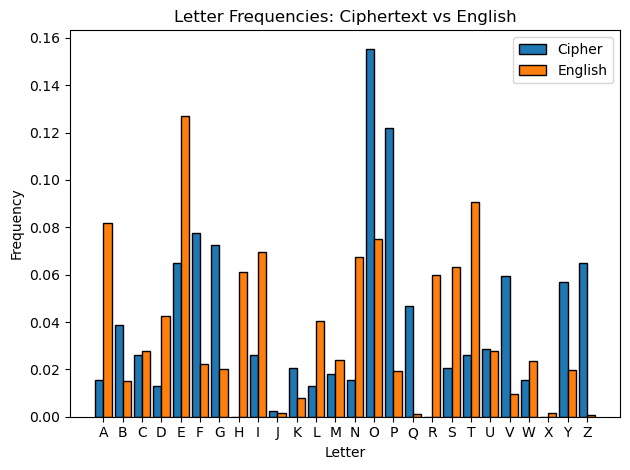


-- Initial reciprocal mapping:
A->F B->D C->C D->B E->O F->A G->M H->Y I->I J->J K->W L->U M->G
N->Z O->E P->T Q->R R->Q S->V T->P U->L V->S W->K X->X Y->H Z->N

Reciprocal OK? True

-- Initial decryption:

GEDLOKE UI RELEHZHSF TNHA DETTER IOC MRE OSE OV TNE VEG LNOAES TO ZHAHT CA MT TNE VHVTN SEJT KOSTN MSW TMBE PMRT OV TNE EDELTHOS PROLEAA GE NOPE TNMT IOC NMZE TNE POAAHUHDHTI TO FHZE CA TNE PDEMACRE OV IOCR LOKPMSI MSW TNMT IOC MLLEPT TN  NOSOCR MA GEDD MA TNE REAPOSAHUHDHTI OV TNHA MAAHFSKEST TNHA IEMR TNE KEETHSF GHDD TMBE PDMLE MT BESAHSFTOS SHSE TMBE TNE UCA TNREE NCSWREW TGEDZE AEZES ATMTHOSA VROK TNE LESTRMD BEEP TNE MWWREAA MA GEDD MA TNE WMI M AELRET UEAT REFMRWA

Top trigrams (ciphertext, letters-only):
 1) PZO -> 11
 2) MOB -> 4
 3) IEC -> 4
 4) SPZ -> 4
 5) FPZ -> 4
 6) YVA -> 3
 7) PZY -> 3
 8) ZYF -> 3
 9) ESP -> 3
10) OVP -> 3

Commands:
  ASOC XY   (associate X with Y; old partners pair up)
  MAP       (show mapping)
  TRI       (show top trigrams)
  PLOT      (show 

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter

COMMON_FREQ = "ETAOINSHRDLCUMWFGYPBVKJXQZ"
COMMON_VALS = [
    0.12702, 0.09056, 0.08167, 0.07507, 0.06966, 0.06749, 0.06327, 0.06094, 0.05987,
    0.04253, 0.04025, 0.02782, 0.02758, 0.02406, 0.02360, 0.02228, 0.02015, 0.01974,
    0.01929, 0.01492, 0.00978, 0.00772, 0.00153, 0.00150, 0.00095, 0.00074
]
ALPHABET = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"


def letter_freq(text: str) -> dict[str, float]:
    letters = [ch for ch in text.upper() if ch.isalpha()]
    total = len(letters)
    freqs = {c: 0.0 for c in ALPHABET}
    if total == 0:
        return freqs
    counts = Counter(letters)
    for c in ALPHABET:
        freqs[c] = counts.get(c, 0) / total
    return freqs


def plot_frequencies(ciphertext: str) -> None:
    ct_freq = letter_freq(ciphertext)
    english_by_letter = {ch: val for ch, val in zip(COMMON_FREQ, COMMON_VALS)}

    letters = list(ALPHABET)
    ct_vals = [ct_freq[c] for c in letters]
    en_vals = [english_by_letter[c] for c in letters]

    x = list(range(len(letters)))
    w = 0.42

    plt.figure()
    plt.bar([i - w/2 for i in x], ct_vals, width=w, edgecolor="black", label="Cipher")
    plt.bar([i + w/2 for i in x], en_vals, width=w, edgecolor="black", label="English")
    plt.xticks(x, letters)
    plt.title("Letter Frequencies: Ciphertext vs English")
    plt.xlabel("Letter")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()


def make_identity_pairs() -> dict[str, str]:
    return {c: c for c in ALPHABET}


def is_reciprocal(mapping: dict[str, str]) -> bool:
    for a in ALPHABET:
        b = mapping.get(a, a)
        if b not in ALPHABET:
            return False
        if mapping.get(b, b) != a:
            return False
    return True


def set_pair(mapping: dict[str, str], a: str, b: str) -> None:
    a = a.upper()
    b = b.upper()
    if a not in ALPHABET or b not in ALPHABET:
        raise ValueError("Letters must be A-Z.")
    mapping[a] = b
    mapping[b] = a


def break_pair(mapping: dict[str, str], a: str) -> None:
    a = a.upper()
    if a not in ALPHABET:
        raise ValueError("Letter must be A-Z.")
    partner = mapping.get(a, a)
    mapping[a] = a
    mapping[partner] = partner


def initial_reciprocal_mapping_by_frequency(ciphertext: str) -> dict[str, str]:
    freqs = letter_freq(ciphertext)
    ranked = [c for c, _ in sorted(freqs.items(), key=itemgetter(1), reverse=True)]

    mapping = make_identity_pairs()
    used = set()

    i = 0
    j = 0
    while i < len(ranked) and j < len(COMMON_FREQ):
        c = ranked[i]
        p = COMMON_FREQ[j]
        i += 1
        j += 1

        if c in used or p in used:
            continue

        set_pair(mapping, c, p)
        used.add(c)
        used.add(p)

    return mapping


def decode(text: str, mapping: dict[str, str]) -> str:
    out = []
    for ch in text:
        if ch.isalpha():
            up = ch.upper()
            out.append(mapping.get(up, up))
        else:
            out.append(ch)
    return "".join(out)


def associate(mapping: dict[str, str], a: str, b: str) -> None:
    a = a.upper()
    b = b.upper()
    if a not in ALPHABET or b not in ALPHABET:
        raise ValueError("Letters must be A-Z.")
    if a == b:
        return

    ap = mapping.get(a, a)
    bp = mapping.get(b, b)

    if ap == b and bp == a:
        return


    if ap == a and bp == b:
        set_pair(mapping, a, b)
        return

    set_pair(mapping, a, b)
    set_pair(mapping, ap, bp)


def top_trigrams(text: str, n: int = 10) -> list[tuple[str, int]]:
    letters = [ch for ch in text.upper() if ch.isalpha()]
    if len(letters) < 3:
        return []
    trigs = (letters[i] + letters[i + 1] + letters[i + 2] for i in range(len(letters) - 2))
    return Counter(trigs).most_common(n)


def print_mapping(mapping: dict[str, str]) -> None:
    pairs = [f"{c}->{mapping.get(c, c)}" for c in ALPHABET]
    print(" ".join(pairs[:13]))
    print(" ".join(pairs[13:]))


def main():
    ct = input("Enter the Cipher Text: ").rstrip("\n")
    ct_up = ct.upper()

    plot_frequencies(ct_up)

    mapping = initial_reciprocal_mapping_by_frequency(ct_up)

    print("\n-- Initial reciprocal mapping:")
    print_mapping(mapping)
    print(f"\nReciprocal OK? {is_reciprocal(mapping)}")

    print("\n-- Initial decryption:\n")
    print(decode(ct, mapping))

    ans = input("\n-- Show top trigrams from CIPHERTEXT? (Y/n): ").strip()
    if ans.lower() in ("", "y", "yes"):
        trigs = top_trigrams(ct, n=10)
        if not trigs:
            print("No trigrams (need at least 3 letters).")
        else:
            print("\nTop trigrams (ciphertext, letters-only):")
            for i, (tri, k) in enumerate(trigs, start=1):
                print(f"{i:2d}) {tri} -> {k}")

    print("\nCommands:")
    print("  ASOC XY   (associate X with Y; old partners pair up)")
    print("  MAP       (show mapping)")
    print("  TRI       (show top trigrams)")
    print("  PLOT      (show frequency plot again)")
    print("  DONE\n")

    while True:
        cmd = input("> ").strip()
        if not cmd:
            continue

        up = cmd.upper()

        if up == "DONE":
            print("\n-- Final decryption:\n")
            print(decode(ct, mapping))
            break

        if up == "MAP":
            print_mapping(mapping)
            print(f"\nReciprocal OK? {is_reciprocal(mapping)}")
            continue

        if up == "TRI":
            current_plain = decode(ct, mapping)
            trigs = top_trigrams(current_plain, n=10)
            if not trigs:
                print("No trigrams (need at least 3 letters).")
            else:
                for i, (tri, k) in enumerate(trigs, start=1):
                    print(f"{i:2d}) {tri} -> {k}")
            continue

        if up == "PLOT":
            plot_frequencies(ct_up)
            continue

        if up.startswith("ASOC"):
            parts = up.split()
            if len(parts) != 2 or len(parts[1]) != 2:
                print("Usage: ASOC XY")
                continue
            a, b = parts[1][0], parts[1][1]
            try:
                associate(mapping, a, b)
            except ValueError as e:
                print(e)
                continue
            print("\n-- Updated decryption:\n")
            print(decode(ct, mapping))
            continue

        if len(up) == 2 and up[0].isalpha() and up[1].isalpha():
            try:
                associate(mapping, up[0], up[1])
            except ValueError as e:
                print(e)
                continue
            print("\n-- Updated decryption:\n")
            print(decode(ct, mapping))
            continue
        print("Unknown command. Try: SWAP XY, MAP, TRI, PLOT, DONE.")


if __name__ == "__main__":
    main()